# Neural Thompson Sampling

<img src="./Figure/algorithm1.png" style="zoom:80%" />

<img src="./Figure/Loss_Function.png" style="zoom:80%" />

This paper prove the bound of expected regret bound, but it directly apply its algorithm on the classification problem, without a testing on online learning theorem.

It might be quite hard to compare its performance on online learning theory.

In [1]:
%reset -f
import numpy as np
import random
from copy import deepcopy
from Source.GameSetting import *
from Source.agent import *

In [2]:
# Set the parameter of the game
np.random.seed(12345)
K = 4  # Total number of actions,
T = 2000  # Total number of periods
d = 6  # the dimension of context
A = np.random.normal(loc=0, scale=1, size=(d, d))

In [3]:
# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
# the setting is based on the description of section 7.1 of the papaer
L = 2
m = 20
nu = 0.001  # {0.01, 0.1, 1}
lambda_ = 0.1  # {0.1, 1, 10}
eta = 0.01  # {0.001, 0.01, 0.1}
frequency = 50
batchsize = 50

neuralagent = NeuralAgent(K=K, T=T, d=d, L=L, m=m, nu=nu, lambda_=lambda_, eta=eta, frequency=frequency, batchsize=batchsize)
bestagent = BestAgent(K, T, d, A)
uniformagent = UniformAgent(K, T, d)
for tt in range(1, T + 1):
    # observe \{x_{t,a}\}_{a=1}^{k=1}
    context_list = SampleContext(d, K)
    realized_reward = GetRealReward(context_list, A)

    # neuralagent
    neural_ind = neuralagent.Action(context_list)  # make a decision
    neural_reward = realized_reward[neural_ind]  # play neural_ind-th arm and observe reward
    neuralagent.Update(neural_reward)

    # bestagent
    best_ind = bestagent.Action(context_list)  # make a decision
    best_reward = realized_reward[best_ind]  # play best_ind-th arm and observe reward
    bestagent.Update(best_reward)

    # uniformagent
    uniform_ind = uniformagent.Action(context_list)  # make a decision
    uniform_reward = realized_reward[uniform_ind]  # play uniform_ind-th arm and observe reward
    uniformagent.Update(uniform_reward)

    print(
        "round index {:d}; neural choose {:d}, reward is {:f}; best choose {:d}, reward is {:f}".format(
            tt,
            neural_ind,
            neural_reward,
            best_ind,
            best_reward,
        )
    )

Using device cuda:0
round index 1; neural choose 1, reward is 5.970296; best choose 3, reward is 6.058994
round index 2; neural choose 3, reward is 11.182923; best choose 2, reward is 13.453164
round index 3; neural choose 1, reward is 9.902005; best choose 3, reward is 11.159319
round index 4; neural choose 3, reward is 7.650661; best choose 3, reward is 7.650661
round index 5; neural choose 2, reward is 7.634407; best choose 1, reward is 8.763254
round index 6; neural choose 0, reward is 10.835408; best choose 1, reward is 11.009118
round index 7; neural choose 1, reward is 9.455545; best choose 2, reward is 11.057343
round index 8; neural choose 3, reward is 5.892616; best choose 1, reward is 10.734774
round index 9; neural choose 3, reward is 8.588041; best choose 1, reward is 11.292976
round index 10; neural choose 2, reward is 5.368042; best choose 1, reward is 12.418214
round index 11; neural choose 1, reward is 8.701197; best choose 1, reward is 8.701197
round index 12; neural 

20 training epoch, mean loss value is 0.28150425871508683
40 training epoch, mean loss value is 0.16899960597796088
60 training epoch, mean loss value is 0.1309732665043606
80 training epoch, mean loss value is 0.1093974502766619
round index 100; neural choose 0, reward is 10.811680; best choose 0, reward is 10.811680
round index 101; neural choose 1, reward is 12.978935; best choose 1, reward is 12.978935
round index 102; neural choose 2, reward is 9.743134; best choose 2, reward is 9.743134
round index 103; neural choose 2, reward is 10.394668; best choose 2, reward is 10.394668
round index 104; neural choose 2, reward is 12.744812; best choose 0, reward is 12.883978
round index 105; neural choose 2, reward is 9.509370; best choose 2, reward is 9.509370
round index 106; neural choose 2, reward is 13.434641; best choose 2, reward is 13.434641
round index 107; neural choose 2, reward is 11.575089; best choose 2, reward is 11.575089
round index 108; neural choose 3, reward is 10.375317;

round index 194; neural choose 3, reward is 8.572119; best choose 3, reward is 8.572119
round index 195; neural choose 1, reward is 11.435341; best choose 1, reward is 11.435341
round index 196; neural choose 0, reward is 12.653941; best choose 0, reward is 12.653941
round index 197; neural choose 2, reward is 7.852361; best choose 2, reward is 7.852361
round index 198; neural choose 0, reward is 11.775319; best choose 0, reward is 11.775319
round index 199; neural choose 3, reward is 10.271521; best choose 3, reward is 10.271521
20 training epoch, mean loss value is 0.1636160559793341
40 training epoch, mean loss value is 0.09717121275382576
60 training epoch, mean loss value is 0.07038004305928104
80 training epoch, mean loss value is 0.057990321569892214
100 training epoch, mean loss value is 0.05050559144258652
round index 200; neural choose 2, reward is 8.677112; best choose 2, reward is 8.677112
round index 201; neural choose 1, reward is 8.773740; best choose 1, reward is 8.7737

round index 298; neural choose 1, reward is 11.738484; best choose 2, reward is 12.158092
round index 299; neural choose 2, reward is 7.613583; best choose 2, reward is 7.613583
20 training epoch, mean loss value is 0.1109049694022376
40 training epoch, mean loss value is 0.06836380988163637
60 training epoch, mean loss value is 0.05214277480873514
80 training epoch, mean loss value is 0.044350025703046025
100 training epoch, mean loss value is 0.041268425905987324
round index 300; neural choose 0, reward is 11.402092; best choose 0, reward is 11.402092
round index 301; neural choose 0, reward is 10.260788; best choose 2, reward is 10.236545
round index 302; neural choose 1, reward is 13.116101; best choose 1, reward is 13.116101
round index 303; neural choose 3, reward is 12.544897; best choose 3, reward is 12.544897
round index 304; neural choose 0, reward is 9.684584; best choose 0, reward is 9.684584
round index 305; neural choose 3, reward is 10.217689; best choose 3, reward is 10

round index 393; neural choose 3, reward is 6.000160; best choose 2, reward is 6.063348
round index 394; neural choose 1, reward is 8.480786; best choose 0, reward is 8.540222
round index 395; neural choose 1, reward is 10.843856; best choose 1, reward is 10.843856
round index 396; neural choose 1, reward is 12.786627; best choose 1, reward is 12.786627
round index 397; neural choose 0, reward is 11.599459; best choose 0, reward is 11.599459
round index 398; neural choose 3, reward is 8.355990; best choose 3, reward is 8.355990
round index 399; neural choose 1, reward is 11.528003; best choose 1, reward is 11.528003
20 training epoch, mean loss value is 0.08325172803857873
40 training epoch, mean loss value is 0.051636649783755886
60 training epoch, mean loss value is 0.04003214531259997
80 training epoch, mean loss value is 0.03303483991786921
100 training epoch, mean loss value is 0.028624584678463863
round index 400; neural choose 2, reward is 10.846704; best choose 1, reward is 10.

round index 489; neural choose 2, reward is 8.206435; best choose 2, reward is 8.206435
round index 490; neural choose 2, reward is 13.376071; best choose 2, reward is 13.376071
round index 491; neural choose 1, reward is 13.293823; best choose 1, reward is 13.293823
round index 492; neural choose 0, reward is 12.026332; best choose 0, reward is 12.026332
round index 493; neural choose 0, reward is 8.487778; best choose 0, reward is 8.487778
round index 494; neural choose 0, reward is 8.797096; best choose 0, reward is 8.797096
round index 495; neural choose 3, reward is 10.630075; best choose 3, reward is 10.630075
round index 496; neural choose 0, reward is 10.867606; best choose 0, reward is 10.867606
round index 497; neural choose 0, reward is 8.717180; best choose 0, reward is 8.717180
round index 498; neural choose 3, reward is 8.675330; best choose 3, reward is 8.675330
round index 499; neural choose 0, reward is 11.525620; best choose 0, reward is 11.525620
20 training epoch, m

round index 588; neural choose 1, reward is 12.287708; best choose 1, reward is 12.287708
round index 589; neural choose 3, reward is 13.437706; best choose 3, reward is 13.437706
round index 590; neural choose 2, reward is 13.197482; best choose 2, reward is 13.197482
round index 591; neural choose 3, reward is 11.312968; best choose 3, reward is 11.312968
round index 592; neural choose 0, reward is 10.832404; best choose 0, reward is 10.832404
round index 593; neural choose 0, reward is 11.294239; best choose 0, reward is 11.294239
round index 594; neural choose 3, reward is 12.553499; best choose 3, reward is 12.553499
round index 595; neural choose 1, reward is 9.049958; best choose 1, reward is 9.049958
round index 596; neural choose 0, reward is 7.971130; best choose 0, reward is 7.971130
round index 597; neural choose 0, reward is 12.587508; best choose 0, reward is 12.587508
round index 598; neural choose 1, reward is 11.069972; best choose 1, reward is 11.069972
round index 59

round index 683; neural choose 0, reward is 10.473908; best choose 0, reward is 10.473908
round index 684; neural choose 1, reward is 12.886160; best choose 1, reward is 12.886160
round index 685; neural choose 2, reward is 9.731099; best choose 2, reward is 9.731099
round index 686; neural choose 0, reward is 10.324687; best choose 0, reward is 10.324687
round index 687; neural choose 3, reward is 8.251349; best choose 3, reward is 8.251349
round index 688; neural choose 2, reward is 9.446295; best choose 2, reward is 9.446295
round index 689; neural choose 3, reward is 11.651067; best choose 3, reward is 11.651067
round index 690; neural choose 1, reward is 11.065091; best choose 1, reward is 11.065091
round index 691; neural choose 2, reward is 8.380305; best choose 2, reward is 8.380305
round index 692; neural choose 1, reward is 13.504545; best choose 1, reward is 13.504545
round index 693; neural choose 1, reward is 11.165625; best choose 1, reward is 11.165625
round index 694; n

round index 769; neural choose 0, reward is 12.777070; best choose 0, reward is 12.777070
round index 770; neural choose 3, reward is 7.315928; best choose 3, reward is 7.315928
round index 771; neural choose 3, reward is 9.849039; best choose 3, reward is 9.849039
round index 772; neural choose 3, reward is 12.405533; best choose 3, reward is 12.405533
round index 773; neural choose 1, reward is 12.413575; best choose 1, reward is 12.413575
round index 774; neural choose 3, reward is 8.813779; best choose 3, reward is 8.813779
round index 775; neural choose 0, reward is 13.502360; best choose 0, reward is 13.502360
round index 776; neural choose 3, reward is 6.427939; best choose 3, reward is 6.427939
round index 777; neural choose 1, reward is 10.635200; best choose 1, reward is 10.635200
round index 778; neural choose 0, reward is 7.824893; best choose 0, reward is 7.824893
round index 779; neural choose 1, reward is 6.827216; best choose 1, reward is 6.827216
round index 780; neura

round index 869; neural choose 0, reward is 13.135157; best choose 0, reward is 13.135157
round index 870; neural choose 1, reward is 12.997220; best choose 1, reward is 12.997220
round index 871; neural choose 1, reward is 12.620613; best choose 1, reward is 12.620613
round index 872; neural choose 1, reward is 7.325061; best choose 1, reward is 7.325061
round index 873; neural choose 0, reward is 9.879356; best choose 0, reward is 9.879356
round index 874; neural choose 1, reward is 5.641832; best choose 2, reward is 6.147677
round index 875; neural choose 3, reward is 6.378703; best choose 3, reward is 6.378703
round index 876; neural choose 2, reward is 12.032154; best choose 2, reward is 12.032154
round index 877; neural choose 2, reward is 10.613160; best choose 2, reward is 10.613160
round index 878; neural choose 2, reward is 11.538594; best choose 2, reward is 11.538594
round index 879; neural choose 3, reward is 11.510988; best choose 3, reward is 11.510988
round index 880; n

round index 966; neural choose 1, reward is 11.172539; best choose 1, reward is 11.172539
round index 967; neural choose 0, reward is 12.133783; best choose 0, reward is 12.133783
round index 968; neural choose 0, reward is 13.180667; best choose 0, reward is 13.180667
round index 969; neural choose 3, reward is 7.744724; best choose 3, reward is 7.744724
round index 970; neural choose 1, reward is 9.903730; best choose 1, reward is 9.903730
round index 971; neural choose 1, reward is 13.296918; best choose 1, reward is 13.296918
round index 972; neural choose 1, reward is 10.004512; best choose 2, reward is 10.067205
round index 973; neural choose 2, reward is 13.432395; best choose 2, reward is 13.432395
round index 974; neural choose 0, reward is 12.177513; best choose 0, reward is 12.177513
round index 975; neural choose 3, reward is 5.907221; best choose 2, reward is 5.951581
round index 976; neural choose 1, reward is 8.358954; best choose 1, reward is 8.358954
round index 977; n

round index 1069; neural choose 3, reward is 12.763430; best choose 3, reward is 12.763430
round index 1070; neural choose 3, reward is 11.968454; best choose 3, reward is 11.968454
round index 1071; neural choose 1, reward is 10.823299; best choose 1, reward is 10.823299
round index 1072; neural choose 1, reward is 12.949672; best choose 1, reward is 12.949672
round index 1073; neural choose 2, reward is 11.227225; best choose 2, reward is 11.227225
round index 1074; neural choose 1, reward is 11.103171; best choose 1, reward is 11.103171
round index 1075; neural choose 3, reward is 11.750310; best choose 3, reward is 11.750310
round index 1076; neural choose 2, reward is 10.290567; best choose 2, reward is 10.290567
round index 1077; neural choose 1, reward is 9.617810; best choose 1, reward is 9.617810
round index 1078; neural choose 2, reward is 12.928931; best choose 2, reward is 12.928931
round index 1079; neural choose 2, reward is 10.670649; best choose 2, reward is 10.670649
r

round index 1169; neural choose 3, reward is 13.034832; best choose 3, reward is 13.034832
round index 1170; neural choose 2, reward is 11.325874; best choose 2, reward is 11.325874
round index 1171; neural choose 0, reward is 10.796311; best choose 0, reward is 10.796311
round index 1172; neural choose 2, reward is 6.799154; best choose 2, reward is 6.799154
round index 1173; neural choose 3, reward is 10.328696; best choose 3, reward is 10.328696
round index 1174; neural choose 3, reward is 6.439879; best choose 3, reward is 6.439879
round index 1175; neural choose 1, reward is 9.257431; best choose 1, reward is 9.257431
round index 1176; neural choose 1, reward is 6.387334; best choose 1, reward is 6.387334
round index 1177; neural choose 2, reward is 11.246502; best choose 2, reward is 11.246502
round index 1178; neural choose 1, reward is 12.849354; best choose 1, reward is 12.849354
round index 1179; neural choose 0, reward is 9.245588; best choose 0, reward is 9.245588
round ind

round index 1271; neural choose 3, reward is 13.321511; best choose 3, reward is 13.321511
round index 1272; neural choose 3, reward is 8.155305; best choose 3, reward is 8.155305
round index 1273; neural choose 3, reward is 7.543619; best choose 3, reward is 7.543619
round index 1274; neural choose 3, reward is 9.353969; best choose 3, reward is 9.353969
round index 1275; neural choose 3, reward is 9.218669; best choose 0, reward is 9.406686
round index 1276; neural choose 2, reward is 13.321081; best choose 2, reward is 13.321081
round index 1277; neural choose 1, reward is 10.367712; best choose 1, reward is 10.367712
round index 1278; neural choose 3, reward is 8.848666; best choose 3, reward is 8.848666
round index 1279; neural choose 1, reward is 13.139689; best choose 1, reward is 13.139689
round index 1280; neural choose 3, reward is 6.764616; best choose 3, reward is 6.764616
round index 1281; neural choose 2, reward is 8.377867; best choose 2, reward is 8.377867
round index 1

round index 1371; neural choose 3, reward is 7.112069; best choose 3, reward is 7.112069
round index 1372; neural choose 0, reward is 9.985333; best choose 0, reward is 9.985333
round index 1373; neural choose 0, reward is 10.250637; best choose 0, reward is 10.250637
round index 1374; neural choose 3, reward is 9.418036; best choose 0, reward is 9.620598
round index 1375; neural choose 1, reward is 13.281470; best choose 1, reward is 13.281470
round index 1376; neural choose 2, reward is 7.123446; best choose 2, reward is 7.123446
round index 1377; neural choose 2, reward is 8.692353; best choose 2, reward is 8.692353
round index 1378; neural choose 1, reward is 11.334033; best choose 3, reward is 11.376976
round index 1379; neural choose 2, reward is 12.421749; best choose 2, reward is 12.421749
round index 1380; neural choose 0, reward is 12.811368; best choose 0, reward is 12.811368
round index 1381; neural choose 3, reward is 8.770717; best choose 0, reward is 8.783676
round index

round index 1470; neural choose 2, reward is 5.564476; best choose 2, reward is 5.564476
round index 1471; neural choose 2, reward is 11.604888; best choose 2, reward is 11.604888
round index 1472; neural choose 1, reward is 12.861050; best choose 1, reward is 12.861050
round index 1473; neural choose 1, reward is 10.527360; best choose 1, reward is 10.527360
round index 1474; neural choose 3, reward is 13.317823; best choose 3, reward is 13.317823
round index 1475; neural choose 3, reward is 11.080591; best choose 3, reward is 11.080591
round index 1476; neural choose 0, reward is 11.263589; best choose 0, reward is 11.263589
round index 1477; neural choose 3, reward is 10.191475; best choose 3, reward is 10.191475
round index 1478; neural choose 0, reward is 12.818835; best choose 0, reward is 12.818835
round index 1479; neural choose 2, reward is 13.266568; best choose 2, reward is 13.266568
round index 1480; neural choose 1, reward is 6.904860; best choose 1, reward is 6.904860
rou

round index 1570; neural choose 2, reward is 7.694449; best choose 2, reward is 7.694449
round index 1571; neural choose 1, reward is 11.693043; best choose 1, reward is 11.693043
round index 1572; neural choose 3, reward is 12.052780; best choose 3, reward is 12.052780
round index 1573; neural choose 0, reward is 12.348398; best choose 0, reward is 12.348398
round index 1574; neural choose 1, reward is 12.779853; best choose 1, reward is 12.779853
round index 1575; neural choose 0, reward is 12.722258; best choose 0, reward is 12.722258
round index 1576; neural choose 2, reward is 9.273420; best choose 2, reward is 9.273420
round index 1577; neural choose 3, reward is 5.732994; best choose 3, reward is 5.732994
round index 1578; neural choose 3, reward is 8.839397; best choose 3, reward is 8.839397
round index 1579; neural choose 2, reward is 7.619287; best choose 2, reward is 7.619287
round index 1580; neural choose 0, reward is 11.874050; best choose 0, reward is 11.874050
round ind

round index 1671; neural choose 3, reward is 12.305607; best choose 3, reward is 12.305607
round index 1672; neural choose 1, reward is 13.008735; best choose 1, reward is 13.008735
round index 1673; neural choose 2, reward is 10.374125; best choose 2, reward is 10.374125
round index 1674; neural choose 2, reward is 12.473192; best choose 2, reward is 12.473192
round index 1675; neural choose 3, reward is 8.512077; best choose 3, reward is 8.512077
round index 1676; neural choose 3, reward is 13.110609; best choose 3, reward is 13.110609
round index 1677; neural choose 3, reward is 12.526403; best choose 3, reward is 12.526403
round index 1678; neural choose 2, reward is 5.556618; best choose 2, reward is 5.556618
round index 1679; neural choose 3, reward is 12.302667; best choose 3, reward is 12.302667
round index 1680; neural choose 3, reward is 11.346726; best choose 3, reward is 11.346726
round index 1681; neural choose 2, reward is 9.481339; best choose 2, reward is 9.481339
round

round index 1771; neural choose 2, reward is 9.399020; best choose 2, reward is 9.399020
round index 1772; neural choose 2, reward is 11.505143; best choose 2, reward is 11.505143
round index 1773; neural choose 1, reward is 10.083418; best choose 1, reward is 10.083418
round index 1774; neural choose 1, reward is 10.019819; best choose 1, reward is 10.019819
round index 1775; neural choose 1, reward is 12.497209; best choose 1, reward is 12.497209
round index 1776; neural choose 3, reward is 9.242591; best choose 3, reward is 9.242591
round index 1777; neural choose 2, reward is 5.612204; best choose 3, reward is 5.810663
round index 1778; neural choose 2, reward is 12.175384; best choose 2, reward is 12.175384
round index 1779; neural choose 0, reward is 10.078385; best choose 0, reward is 10.078385
round index 1780; neural choose 2, reward is 9.149278; best choose 2, reward is 9.149278
round index 1781; neural choose 1, reward is 10.561491; best choose 1, reward is 10.561491
round i

round index 1870; neural choose 1, reward is 9.495545; best choose 1, reward is 9.495545
round index 1871; neural choose 2, reward is 12.980648; best choose 2, reward is 12.980648
round index 1872; neural choose 0, reward is 9.840524; best choose 0, reward is 9.840524
round index 1873; neural choose 2, reward is 11.497385; best choose 2, reward is 11.497385
round index 1874; neural choose 1, reward is 13.237912; best choose 1, reward is 13.237912
round index 1875; neural choose 3, reward is 9.621633; best choose 1, reward is 9.650630
round index 1876; neural choose 3, reward is 5.821912; best choose 3, reward is 5.821912
round index 1877; neural choose 2, reward is 13.419455; best choose 2, reward is 13.419455
round index 1878; neural choose 2, reward is 11.787823; best choose 2, reward is 11.787823
round index 1879; neural choose 2, reward is 12.424712; best choose 2, reward is 12.424712
round index 1880; neural choose 2, reward is 7.469429; best choose 2, reward is 7.469429
round ind

round index 1970; neural choose 0, reward is 9.405417; best choose 0, reward is 9.405417
round index 1971; neural choose 1, reward is 10.121800; best choose 1, reward is 10.121800
round index 1972; neural choose 3, reward is 13.168880; best choose 3, reward is 13.168880
round index 1973; neural choose 2, reward is 10.280893; best choose 2, reward is 10.280893
round index 1974; neural choose 2, reward is 12.598929; best choose 2, reward is 12.598929
round index 1975; neural choose 3, reward is 10.450177; best choose 3, reward is 10.450177
round index 1976; neural choose 3, reward is 12.604430; best choose 3, reward is 12.604430
round index 1977; neural choose 2, reward is 12.229113; best choose 2, reward is 12.229113
round index 1978; neural choose 0, reward is 9.091304; best choose 0, reward is 9.091304
round index 1979; neural choose 0, reward is 9.464431; best choose 0, reward is 9.464431
round index 1980; neural choose 3, reward is 9.599342; best choose 3, reward is 9.599342
round i

Text(0, 0.5, 'Total Reward')

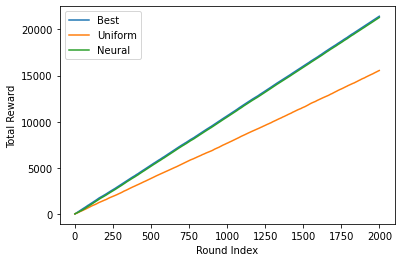

In [4]:
import matplotlib.pyplot as plt
h_r_b = bestagent.history_reward
plt.plot(range(0, T), np.cumsum(h_r_b))

h_r_u = uniformagent.history_reward
plt.plot(range(0, T), np.cumsum(h_r_u))

h_r_n = neuralagent.history_reward
plt.plot(range(0, T), np.cumsum(h_r_n))

plt.legend(["Best", "Uniform", "Neural"])
# plt.legend(["Best", "Uniform"])
plt.xlabel("Round Index")
plt.ylabel("Total Reward")

Text(0.5, 1.0, 'The ratio of reward')

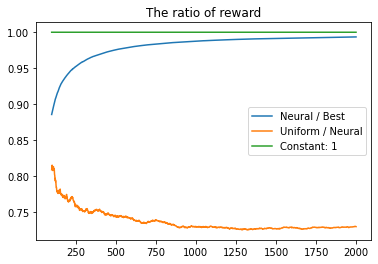

In [5]:
plt.plot(range(100, T), np.cumsum(h_r_n)[100:T] / np.cumsum(h_r_b)[100:T])
plt.plot(range(100, T), np.cumsum(h_r_u)[100:T] / np.cumsum(h_r_n)[100:T])
plt.plot(range(100, T), np.ones(T)[100:T])
plt.legend(["Neural / Best", "Uniform / Neural", "Constant: 1"])
plt.title("The ratio of reward")

We can see that ratio of neural reward over best reward would converge to 1

Text(0.5, 1.0, 'The ratio of of adopting same decision')

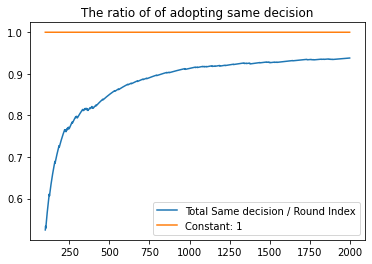

In [6]:
action_match = np.cumsum(neuralagent.history_action == bestagent.history_action)
action_match_ratio = action_match / np.array(range(1, T + 1))
plt.plot(range(100, T), action_match_ratio[100:T])
plt.plot(range(100, T), np.ones(T)[100:T])
plt.legend(["Total Same decision / Round Index", "Constant: 1"])
plt.title("The ratio of of adopting same decision")

In [14]:
np.cumsum(h_r_n)[-10:] / np.cumsum(h_r_b)[-10:]

array([0.9892251 , 0.98922779, 0.98923023, 0.98923294, 0.98923596,
       0.98923905, 0.98924209, 0.98924245, 0.98922302, 0.98922607])